In [12]:
# Importing Libraries
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [13]:
# Importing Dataset and Replacing null values with mean
dataset = pd.read_csv("CC.csv")

In [14]:
X = dataset.iloc[:, 1:]

In [15]:
X = X.select_dtypes(include=[np.number]).interpolate().fillna(X.select_dtypes(include=[np.number]).interpolate().mean(axis=0))

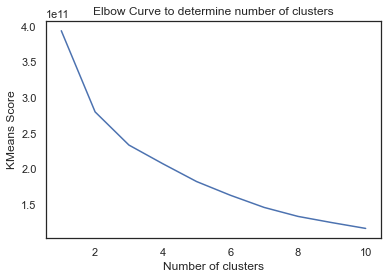

In [16]:
# Elbow Method to determine K value
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve to determine number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("KMeans Score")
plt.show()

In [17]:
# KMeans Model without scaling
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [18]:
y_cluster_kmeans = kmeans.predict(X)

In [19]:
# Score Calculation
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)

In [20]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [21]:
# KMeans Model after Scaling
scaled_kmeans = KMeans(n_clusters=3, random_state=42)
scaled_kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [22]:
y_scaled_kmeans = scaled_kmeans.predict(X_scaled)

In [23]:
scaled_score = metrics.silhouette_score(X, y_scaled_kmeans)

In [24]:
# Applying PCA on data
from sklearn.decomposition import PCA
pca = PCA(3)
X_pca = pca.fit_transform(X)

In [25]:
# KMeans model after applying PCA
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_pca)
y_pca_kmeans= kmeans_pca.predict(X_pca)
pca_score = metrics.silhouette_score(X_pca, y_pca_kmeans)

In [26]:
# KMeans Model after applying PCA on scaled Data
pca_scaled = PCA(2)
X_pca_scaled= pca_scaled.fit_transform(X_scaled)

In [27]:
kmeans_pca_scaled = KMeans(n_clusters=3)
kmeans_pca_scaled.fit(X_pca_scaled)
y_pca_kmeans_scaled = kmeans_pca_scaled.predict(X_pca_scaled)
pca_scaled_score = metrics.silhouette_score(X_pca_scaled, y_pca_kmeans_scaled)

In [28]:

print("Score before Scaling :", score)
print("Score after Scaling :", scaled_score)
print("Score after applying PCA:",pca_score)
print("Score after applying PCA on scaled data:",pca_scaled_score)

Score before Scaling : 0.46657902186659234
Score after Scaling : 0.3396132298444733
Score after applying PCA: 0.5116971541439415
Score after applying PCA on scaled data: 0.4523356576811779


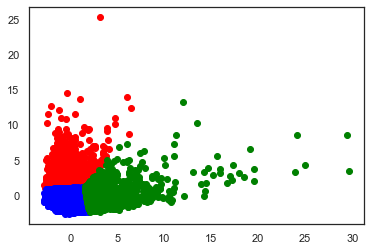

In [29]:
colors = ["red", "blue", "green"]
for i in range(3):
    x_axis = X_pca_scaled[y_pca_kmeans_scaled == i][:,0]
    y_axis = X_pca_scaled[y_pca_kmeans_scaled == i][:,1]
    plt.scatter(x_axis,y_axis,color=colors[i]) 